# Import

In [1]:
import pandas as pd
import warnings
import helper
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Load Datasets

In [2]:
# Load stats
classification = pd.read_csv("../processed_files/classification_auc.csv")
under_samp = pd.read_csv("../processed_files/under_sampling_auc.csv")
smote = pd.read_csv("../processed_files/smote_auc.csv")
over_samp = pd.read_csv("../processed_files/over_sampling_auc.csv")

# Data Visualization

In [3]:
over_samp

,classifiers,fpr,tpr,auc
0,DecisionTreeClassifier,[0. 0.24543704 1. ],[0. 0.93320752 1. ],0.843885
1,ExtraTreesClassifier,[0. 0.27001743 1. ],[0. 0.95631328 1. ],0.843148
2,GradientBoostingClassifier,[0. 0.07832707 1. ],[0. 0.87054653 1. ],0.896110
3,RandomForestClassifier,[0. 0.14179584 1. ],[0. 0.93453368 1. ],0.896369
4,BaggingClassifier,[0. 0.13831056 1. ],[0. 0.92012445 1. ],0.890907
5,AdaBoostClassifier,[0. 0.13886086 1. ],[0. 0.85797353 1. ],0.859556


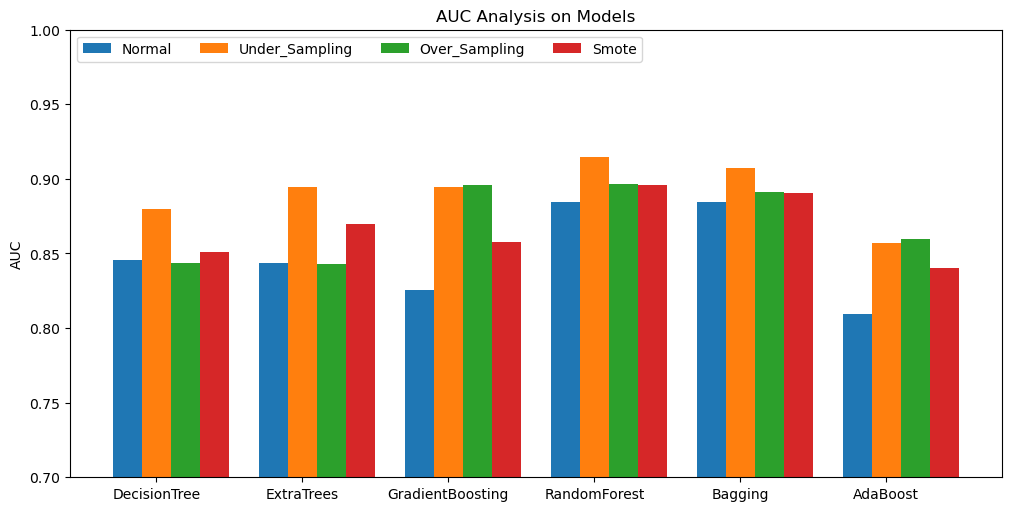

In [4]:
classifiers = ("DecisionTree", "ExtraTrees", "GradientBoosting","RandomForest","Bagging", "AdaBoost")
values = {
    'Normal': (classification.iloc[0]['auc'], classification.iloc[1]['auc'], classification.iloc[2]['auc'],
              classification.iloc[3]['auc'],classification.iloc[4]['auc'],classification.iloc[5]['auc']),
    'Under_Sampling': (under_samp.iloc[0]['auc'], under_samp.iloc[1]['auc'], under_samp.iloc[2]['auc'],
              under_samp.iloc[3]['auc'],under_samp.iloc[4]['auc'],under_samp.iloc[5]['auc']),
    'Over_Sampling': (over_samp.iloc[0]['auc'], over_samp.iloc[1]['auc'], over_samp.iloc[2]['auc'],
              over_samp.iloc[3]['auc'],over_samp.iloc[4]['auc'],over_samp.iloc[5]['auc']),
    'Smote': (smote.iloc[0]['auc'], smote.iloc[1]['auc'], smote.iloc[2]['auc'],
              smote.iloc[3]['auc'],smote.iloc[4]['auc'],smote.iloc[5]['auc']) 
         }

x = np.arange(len(classifiers))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(10, 5))

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=6)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('AUC Analysis on Models')
ax.set_xticks(x + width, classifiers)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0.7, 1)
plt.show()

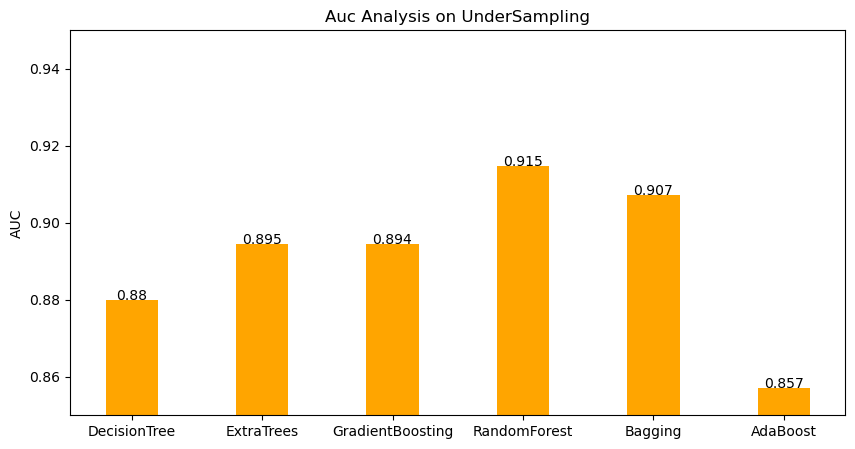

In [6]:
data = {'DecisionTree':under_samp.iloc[0]['auc'], 'ExtraTrees':under_samp.iloc[1]['auc'],
        'GradientBoosting':under_samp.iloc[2]['auc'],'RandomForest':under_samp.iloc[3]['auc'],
        'Bagging':under_samp.iloc[4]['auc'],'AdaBoost':under_samp.iloc[5]['auc']}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='orange', 
        width = 0.4)

for i in range(len(courses)):
    plt.text(i, values[i], round(values[i],3), ha = 'center')    
    
plt.ylim(0.85, 0.95)
plt.ylabel("AUC")
plt.title("Auc Analysis on UnderSampling")
plt.show()